## 3.6.1 Importing packages

In [10]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

# New imports
import statsmodels.api as sm
# Specific module imports to keep a clean namespace
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

# From book
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                        summarize,
                        poly)

#### Inspecting objects and namespaces

In [ ]:
dir() # provides list of objects in a namespace

['In',
 'MS',
 'Out',
 'VIF',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'exit',
 'get_ipython',
 'load_data',
 'np',
 'open',
 'pd',
 'poly',
 'quit',
 'sm',
 'subplots',
 'summarize']

In [13]:
# Objects have their own notion of namespace that we can see by passing the object into dir()
A = np.array([3, 5, 11])
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_namespace__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '_

## 3.6.2 Simple Linear Regression
We will construct model matrices

In [14]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [ ]:
# Creating the model matrix
# sm.OLS() to fit a simple linear regression with 
X = pd. DataFrame ({'intercept': np.ones(Boston.shape[0]),
                    'lstat': Boston['lstat']})
X[:4]

intercept  lstat
0        1.0   4.98
1        1.0   9.14
2        1.0   4.03
3        1.0   2.94

Extracting this response, we will fit the model using **lstat** as our predictor to predict **medv**

In [ ]:
y = Boston['medv']
model = sm.OLS(y, X) # specifies the model (linear regression on y using X)
results = model.fit() # fits the model and returns a summary
summarize(results) # ISLP function 

coef  std err       t  P>|t|
intercept  34.5538    0.563  61.415    0.0
lstat      -0.9500    0.039 -24.528    0.0

### Using Transformations: Fit and Transform
We often wish to introduce transformations to variables before fitting, specify interactions between variables, and expand single variables into sets for polynomial functionality. 

Within **sklearn** package has a particular notion for this type of task: *transform*. 
Transform is an object that is created with some parameters as objects with methods:
**fit()**: Takes the original array and usually performs computations on it 
**transform()**: Applies the fitted transformation to the array of data, and produces model matrix


In [ ]:
design = MS(['lstat']) # MS -> ModelSpec() in ISLP & creates a transform object 
design = design.fit(Boston) # We didn't apply a computational change
X = design. transform (Boston) # Constructs model matrix with two columns: intercept and lstat
X[:4]

intercept  lstat
0        1.0   4.98
1        1.0   9.14
2        1.0   4.03
3        1.0   2.94

The two operations can be combined using **X = design.fit_transform()**

In [21]:
# Fuller summary of the fit 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 30 May 2025   Prob (F-statistic):           5.08e-88
Time:                        01:17:28   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# coefficients usinng params attribute
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [23]:
# get_prediction() method can be used to obtain predictions, confidence intervals, and prediciton intervals 
new_df = pd.DataFrame ({'lstat':[5, 10, 15]}) # making predictions at these values
newX = design.transform(new_df) # creating model matrix
newX

intercept  lstat
0        1.0      5
1        1.0     10
2        1.0     15

Computing the predictions at **newX**, and view them using **predicted_mean** attribute, then producing confidence/prediction intervals for these values

In [25]:
new_predictions = results.get_prediction(newX);
print('Computed predictions:\n', new_predictions.predicted_mean)
print('\nConfidence interval\n', new_predictions.conf_int(alpha=0.05))
print('\nPrediction intervals\n', new_predictions.conf_int(obs=True, alpha=0.05))

Computed predictions:
 [29.80359411 25.05334734 20.30310057]

Confidence interval
 [[29.00741194 30.59977628]
 [24.47413202 25.63256267]
 [19.73158815 20.87461299]]

Prediction intervals
 [[17.56567478 42.04151344]
 [12.82762635 37.27906833]
 [ 8.0777421  32.52845905]]


The first interval would be the confidence/prediction variable associated with the first **lstat** value we passed (10). Notice the greater range of the prediction interval. 

### Defining Functions
Defining a function to add a line to an existing plot

In [ ]:
# ax is an axis object for an existing plot that we will pas, b is the intercept, and m is the slope of the function. 
def abline(ax, b, m):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim , ylim)

Just showcasing other plotting options next to asterisk where *args allows any number of non-named arguments to **abline** and **kwargs** allows any number of named arguments (such as **linewidth=3**) **abline**. Read more about functions on ['link'](docs.python.org/tutorial)

```python
def abline(ax , b, m, *args , ** kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax. get_xlim ()
    ylim = [m * xlim [0] + b, m * xlim [1] + b]
    ax.plot(xlim , ylim , *args , ** kwargs)
```

We will go ahead and use our defined function to add the regression line

/var/folders/4p/qzmyfrkd24b_w7lsng1bmm100000gn/T/ipykernel_3697/716062634.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/var/folders/4p/qzmyfrkd24b_w7lsng1bmm100000gn/T/ipykernel_3697/716062634.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],)


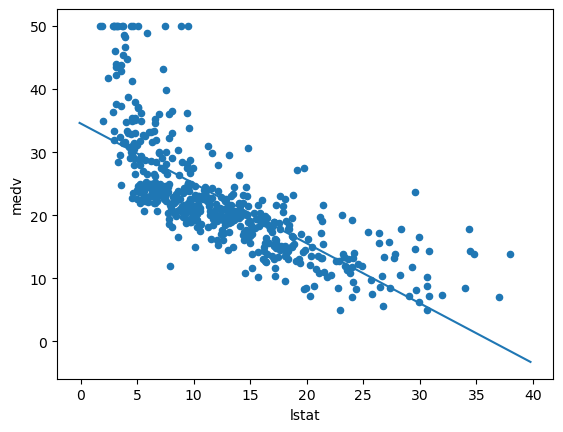

In [ ]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax,
       results.params[0],
       results.params[1])

/var/folders/4p/qzmyfrkd24b_w7lsng1bmm100000gn/T/ipykernel_3697/1976328140.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/var/folders/4p/qzmyfrkd24b_w7lsng1bmm100000gn/T/ipykernel_3697/1976328140.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


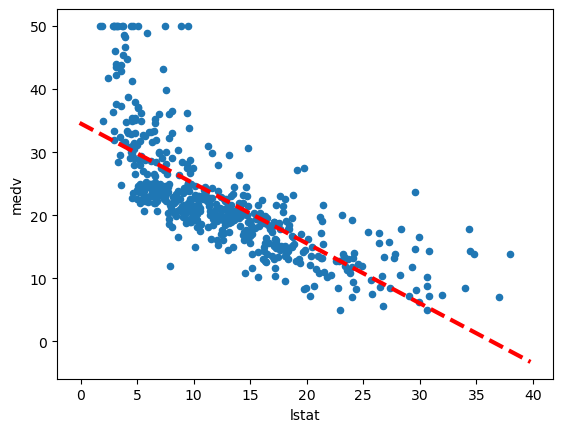

In [ ]:
# example using additional arguments
def abline(ax , b, m, *args , ** kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim ()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

ax = Boston.plot.scatter('lstat', 'medv')
abline(ax ,
       results.params[0],
       results.params[1],
       'r--', # red dashed line
       linewidth=3)

Examining some other plots

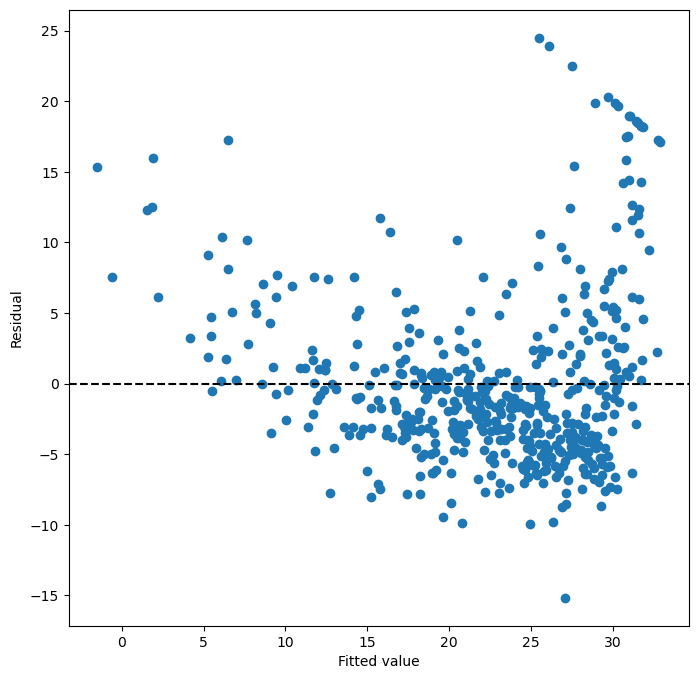

In [35]:
ax = subplots(figsize =(8, 8))[1] # only extracting ax object
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--'); # adding a horizontal line at 0, making the color black, and dashed line style

We can use the **hat_matrix_diag** attribute on the value returned by **get_influence()** method to compute leverage statistics for any number of predictors. 

np.int64(374)

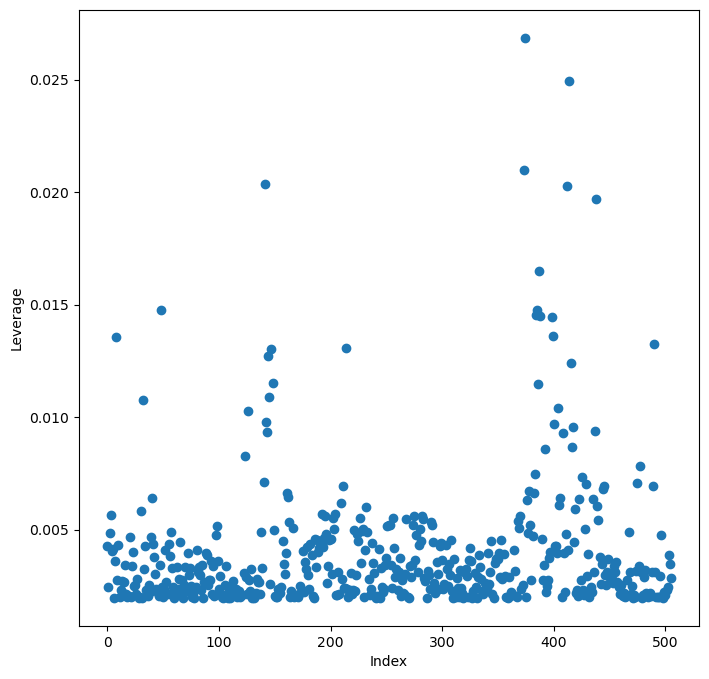

In [ ]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag) # identifies the index of the largest element of an array. 

## 3.6.3 Multiple Linear Regression
We will be fitting a MLR using least squares. 

In [ ]:
# creating model matrix. pasting a list of column names as arguments
X = MS(['lstat', 'age']).fit_transform(Boston) # Optimization 1: combined expressions
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

coef  std err       t  P>|t|
intercept  33.2228    0.731  45.458  0.000
lstat      -1.0321    0.048 -21.416  0.000
age         0.0345    0.012   2.826  0.005

In [39]:
# short hand notation to use all predictors in the data set
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

We can now fit the model using all the variables in terms (every variable except our reponse *medv*)

In [40]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

coef  std err       t  P>|t|
intercept  41.6173    4.936   8.431  0.000
crim       -0.1214    0.033  -3.678  0.000
zn          0.0470    0.014   3.384  0.001
indus       0.0135    0.062   0.217  0.829
chas        2.8400    0.870   3.264  0.001
nox       -18.7580    3.851  -4.870  0.000
rm          3.6581    0.420   8.705  0.000
age         0.0036    0.013   0.271  0.787
dis        -1.4908    0.202  -7.394  0.000
rad         0.2894    0.067   4.325  0.000
tax        -0.0127    0.004  -3.337  0.001
ptratio    -0.9375    0.132  -7.091  0.000
lstat      -0.5520    0.051 -10.897  0.000

#### Finding values to exclude
We see **age**  & **indus**have high p-values, lets try running regression exlcuding this predictor.

In [42]:
minus_age = Boston.columns.drop(['medv', 'age', 'indus'])
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
summarize(model1.fit())

coef  std err       t  P>|t|
intercept  41.4517    4.903   8.454  0.000
crim       -0.1217    0.033  -3.696  0.000
zn          0.0462    0.014   3.378  0.001
chas        2.8719    0.863   3.329  0.001
nox       -18.2624    3.565  -5.122  0.000
rm          3.6730    0.409   8.978  0.000
dis        -1.5160    0.188  -8.078  0.000
rad         0.2839    0.064   4.440  0.000
tax        -0.0123    0.003  -3.608  0.000
ptratio    -0.9310    0.130  -7.138  0.000
lstat      -0.5465    0.047 -11.519  0.000

## 3.6.3 Mutlivariate Goodness of Fit
It is desirable to access specific results from **results**. We can see the components available with **dir()**

### List Comprehension
We will compute the *VIF* value for each feature in our **X** matrix and produce a data frame whose index aligns with **X**. 
We will use list comprehensions to form lists of Python objects.

In [ ]:
# VIF() is the function variance_inflation_factor(). 
# Takes two arugments: df or array and a variable column index (here we excluded 0)
# We use this function to compute the VIF for all variables in model matrix X 
vals = [VIF(X, i)
        for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X.columns[1:])
vif

vif
crim     1.767486
zn       2.298459
indus    3.987181
chas     1.071168
nox      4.369093
rm       1.912532
age      3.088232
dis      3.954037
rad      7.445301
tax      9.002158
ptratio  1.797060
lstat    2.870777

## 3.6.5 Interaction Terms
We can use *tuples* `('lstat', 'age')` to tell the model matrix builder to include an interaction term

In [45]:
X = MS(['lstat',
        'age',
        ('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

coef  std err       t  P>|t|
intercept  36.0885    1.470  24.553  0.000
lstat      -1.3921    0.167  -8.313  0.000
age        -0.0007    0.020  -0.036  0.971
lstat:age   0.0042    0.002   2.244  0.025

### 3.6.3 Non-linear Transformations of the Predictors
The matrix builder can include terms beyond column names and interactions. We can use the **poly()** function to specify that columns representing polynomial funtions of its first argument are added to the model matrix. The lower p-value shown below associated with the quadratic term suggest that it improves our model. 

In [46]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

coef  std err       t  P>|t|
intercept                  17.7151    0.781  22.681    0.0
poly(lstat, degree=2)[0] -179.2279    6.733 -26.620    0.0
poly(lstat, degree=2)[1]   72.9908    5.482  13.315    0.0
age                         0.0703    0.011   6.471    0.0

#### Using anova_lm() function to further quantiy if the quadratic fit is superior to the linear fit
results1 is our linear fit, latter is quadratic. The anova function performs a hypothesiss test comparing the models with the null hypothesis being if the quadratic term in the latter model is not needed. Alternative is that the bigger model is superior. 

In [47]:
anova_lm(results1, results3)

df_resid           ssr  df_diff      ss_diff           F        Pr(>F)
0     503.0  19168.128609      0.0          NaN         NaN           NaN
1     502.0  14165.613251      1.0  5002.515357  177.278785  7.468491e-35

The F-Statistic is the square of the T-statistic for the quadratic term in the linear model summary for results3. This provides clear evidence that the quadratic polynomial in **lstat** improves the linear model. (This makes sense as the graph showed essence of non-linearity)

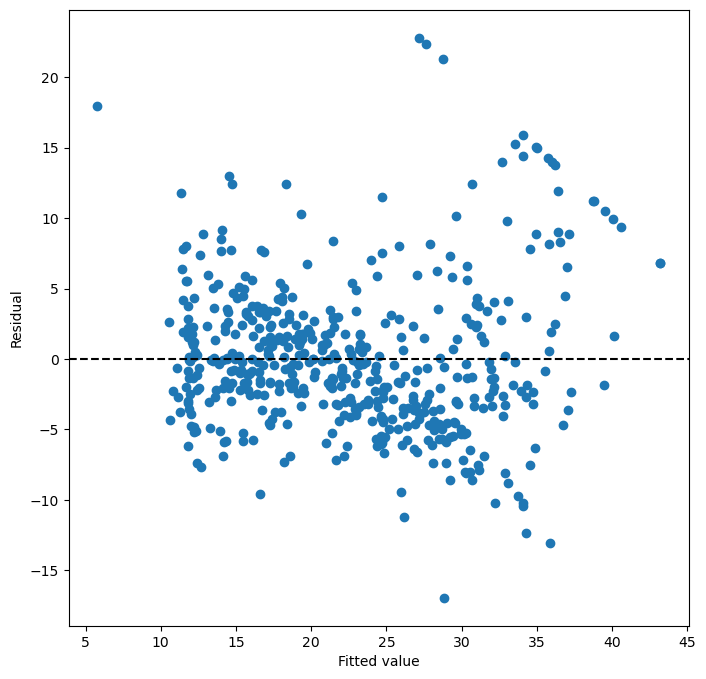

In [48]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues , results3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

Residuals do not have a set pattern when we include a quadratic term in the model (improvement)

## 3.6.7 Qualitative Predictors
Predicting sales in 400 locations based on a number of predictors
#### Loading Data

In [49]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

This dataset has qualitative preditors. For example **ShelveLoc** which takes on values *Bad, Medium, Good*. **ModelSpec()** generates dummy varaibles that are referreed to as a *one-hot encoding* of the categorical feature. 

Fitting a multiple regression model that includes some interaction terms

In [50]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'),
                   ('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())

coef  std err       t  P>|t|
intercept           6.5756    1.009   6.519  0.000
CompPrice           0.0929    0.004  22.567  0.000
Income              0.0109    0.003   4.183  0.000
Advertising         0.0702    0.023   3.107  0.002
Population          0.0002    0.000   0.433  0.665
Price              -0.1008    0.007 -13.549  0.000
ShelveLoc[Good]     4.8487    0.153  31.724  0.000
ShelveLoc[Medium]   1.9533    0.126  15.531  0.000
Age                -0.0579    0.016  -3.633  0.000
Education          -0.0209    0.020  -1.063  0.288
Urban[Yes]          0.1402    0.112   1.247  0.213
US[Yes]            -0.1576    0.149  -1.058  0.291
Income:Advertising  0.0008    0.000   2.698  0.007
Price:Age           0.0001    0.000   0.801  0.424